## **Project Details**
**Title:** CYO Project

**Due Date:** 13 May 2024

**Contributors:**
- Dineo Mogale (576500) 
- Ewan Morris (577388)
- Marcus Mahlatjie (577296)
- Tiaan Kritzinger (577643)
- Quinton Crouse (577696)
- Zoë Treutens (577989)

**GitHub Link:** https://github.com/Zoe21354/MLG382_GroupF_CYOProject.git

===================================================================================

# **Creditworthiness Assessment and Risk Analysis for Loan Default Prediction**
This project is a comprehensive study aimed at **building a predictive model to assess the creditworthiness of individuals or businesses**. The purpose of this project is to predict the risk of default on loans or credit lines, which is a critical aspect of financial risk assessment.

The project utilizes a dataset titled “Credit Risk Assessment” authored by Urvish Vekariya and sourced from Kaggle. The dataset will undergo a series of data analysis and preprocessing steps, including dataset analysis, univariate and bi-variate analysis, handling missing values, removing duplicates, and outlier value handling. Two models will be built and their predictions will be evaluated. The feature importance from each model will be analyzed and the models will be saved as pickle files for future use. The second model will undergo additional cross-validation to ensure its robustness.

Finally, the validated model will be deployed as a server in a web application using DASH, providing a practical interface for credit risk assessment. This project is a significant step towards leveraging machine learning for effective and efficient credit risk management. It aims to provide a reliable tool for financial institutions to make informed decisions regarding loan approvals and credit line extensions.



This notebook will take the following structure:

    1. Prepare Data (Data Analysis)
        A. Dataset Analysis
        B. Univariate Analysis
        C. Bi-variate Analysis
    2. Hypotheses
    3. Preprocess Data (Data Cleaning)
        A. Handling missing values
        B. Removing duplicates
        C. Outlier value Handling
    4. Split Dataset
    5. Model 1
        A. Build Model
        B. Create Pickle File
    6. Feature Engineering
    7. Model 2
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Cross Validation Models
        E. Create Pickle File
    8. Validate Model 2
    9. Web Application

===================================================================================

# **1. Prepare Data**
Before any coding can take place, certain libraries in python need to be imported to perform different functions and make various features available for use.

In [2]:
# Import Libraries
import csv                                              # Read and Write to CSV files
import pandas as pd                                     # Manipulation and analysis of data
import numpy as np                                      # Mathematical operations
import matplotlib.pyplot as plt                         # Matplotlib and Seaborn is used to create visual graphs
import seaborn as sns                                   
from sklearn.model_selection import train_test_split    # Splits the raw_data into two sets of data
import warnings                                         # Ignores any future warnings
warnings.filterwarnings('ignore')  

The CSV files named credit_risk_raw_data and credit_risk_validation_data are read so that the unclean data contained in these files can be analyzed.

In [3]:
# Read Unclean CSV Files
raw_data = pd.read_csv('../Data/Original Data/credit_risk_raw_data.csv')
raw_data_copy = raw_data.copy()

validation_data = pd.read_csv('../Data/Original Data/validation_data.csv')
validation_data_copy = validation_data.copy()

# **A. DATA ANALYSIS PROCESSES**
## 1. Dataset Analysis

In [4]:
# Dataset Attributes:
print(f"Raw Data Columns: {raw_data_copy.columns}\n")
print(f"Validation Data Columns:{validation_data_copy.columns}\n")

Raw Data Columns: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

Validation Data Columns:Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')



***Insights Gained:***
- The attribute names are inconsistent and will need standardizing in the data processing section.
- Feature Variable (Independent variable): This variable stands alone and is not changed by other variables that are being measured. It is denoted as X in ML algorithms.
- Target Variable (Dependent variable): This is the variable that is to be predicted. It is often denoted as Y in ML algorithms.
- In both datasets there are 10 feature variables but only the raw_data dataset has 1 target variable.
- The target variable in the raw_data dataset is the loan_status attribute.
- This variable will be predicted using models for the validation_data dataset.

### *Dataset Datatypes:*
Attributes can have different data types, such as numerical, categorical, or ordinal. Knowing the data type of each attribute is important because it determines what kind of statistical analysis or data processing is appropriate. Learning the different datatypes for each attribute in both of the datasets will provide insight into the consistance of the datattypes for each specific attribute.

In [5]:
# Dataset DataTypes:
print(f"Raw Dataset Datatypes:\n{raw_data_copy.dtypes}\n")
print(f"Validation Dataset Datatypes:\n{validation_data_copy.dtypes}\n")

Raw Dataset Datatypes:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

Validation Dataset Datatypes:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length      int64
dtype: object



***Insights Gained:***
- There is a discrepancy between the two datasets: the "person_emp_length" attribute is of datatype float64 in the raw_data.csv file but of datatype int64 in the validation_data.csv file. 
- This could lead to potentially issues when modeling, as the model might be expecting the same data type for a given attribute.
- This discrepancy will need to be fixed in the data processing section.

### *Dataset Shape:*
Knowing the number of rows in your datasets provides you with an idea of the volume of the data available to you. More rows mean more data, which can lead to more robust and reliable models. However, it can also mean more computational resources and time required for processing. On the other hand knowing the number of columns in the dataset informs the user on the number of features (or variables) available. Overall the analysis of the shape of the dataset can help in assessing the quality of the data.

In [6]:
print(f"Raw Data Shape:\n{raw_data_copy.shape}")
print(f"Validation Data Shape:\n{validation_data_copy.shape}")

Raw Data Shape:
(1526, 10)
Validation Data Shape:
(470, 9)


***Insights Gained:***
- Raw Data Shape: 1498 rows and 10 columns
- Validation Data Shape: 470 rows and 9 columns

# 2. Univariate Analysis

When there is just one variable in the data it is called univariate analysis. 
This is the most basic type of data analysis and finds patterns in the data.
Analyzing univariate data involves examining:
- Frequency of data
- Mean, mode, median, and range

### *Dependent (Target) Attribute:*

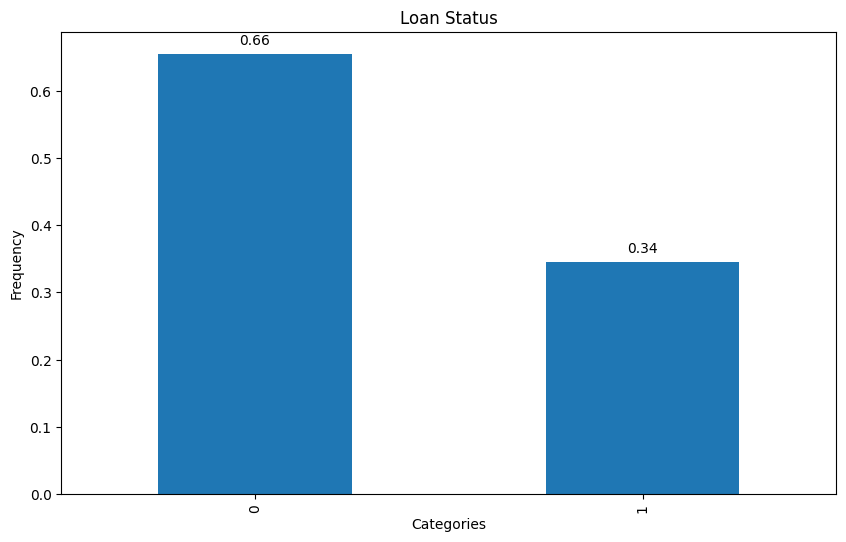

In [7]:
#Dependent Variable
plt.figure(figsize=(10, 6))
count = raw_data_copy['loan_status'].value_counts(normalize = True)
chart = count.plot.bar(title = 'Loan Status', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.66 or 66% of the people were approved for a loan (i.e Loan_Status = Yes)
- 0.34 or 34% of the people were not approved for a loan (i.e Loan_Status = No)

### *Independent Attributes (Ordinal):*
Ordinal data have a clear ordering or hierarchy in the categories. For example, customer satisfaction ratings can include: unsatisfied, neutral, or satisfied.

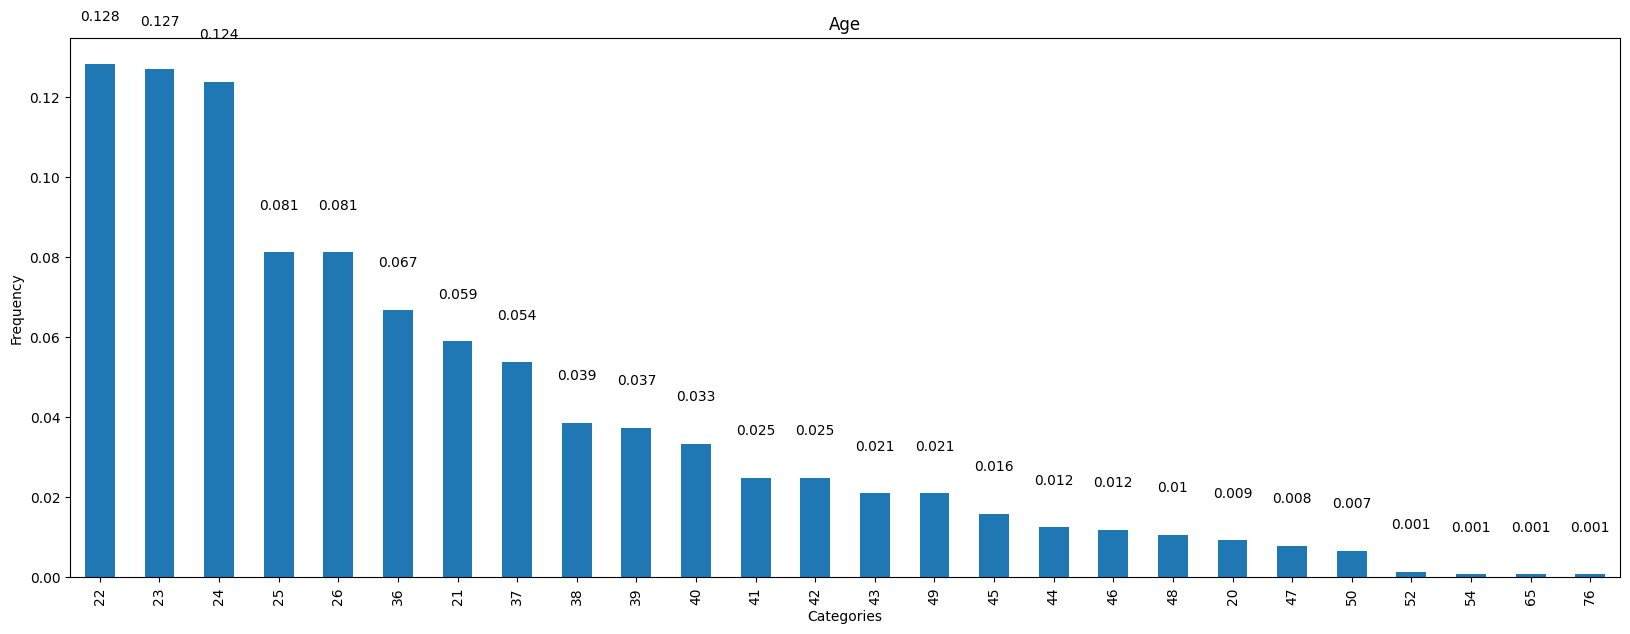

In [18]:
#person_age
plt.figure(figsize=(20, 7))
count = raw_data_copy['person_age'].value_counts('normalize = True')
chart = count.plot.bar(title='Age', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- The age group ranges from early 20s to 50s
- With the largest number of people being of age 22 to 24
- There are outlier ages that need to be addressed in the processing stage.

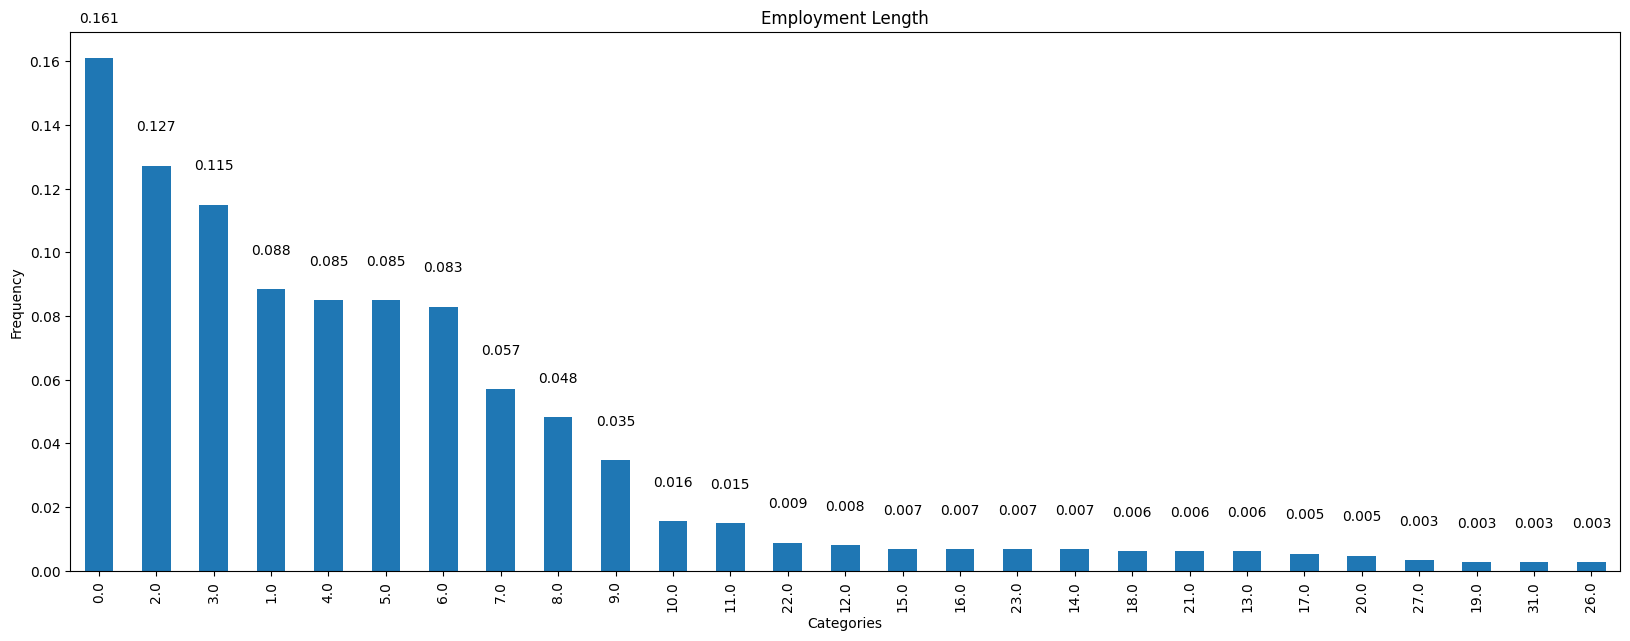

In [19]:
#person_emp_length
plt.figure(figsize=(20, 7))
count =raw_data_copy['person_emp_length'].value_counts('normalize = True')
chart = count.plot.bar(title='Employment Length', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- The most common employment length is less than a year, suggesting a high turnover rate or many short-term positions.
- There is a noticeable trend of decreasing frequency as employment length increases, showing that longer tenures are less common.
- Overall, the graph sheds light on the dynamics of the workforce, particularly in terms of employment longevity and the distribution of tenure lengths.

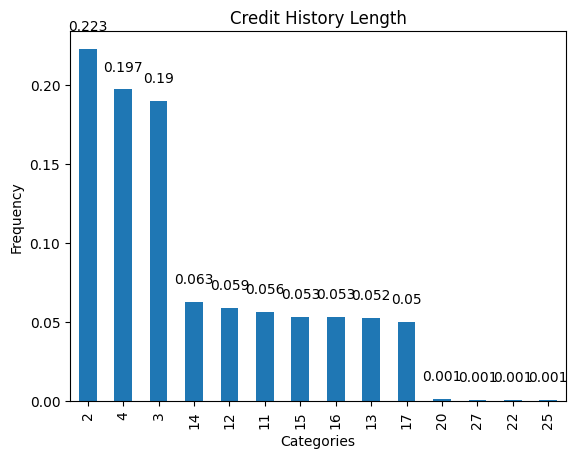

In [10]:
#cb_person_cred_hist_length
plt.figure(figsize=(20, 7))
count =raw_data_copy['cb_person_cred_hist_length'].value_counts('normalize = True')
chart = count.plot.bar(title='Credit History Length', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- The distribution appears to be right-skewed, meaning there are more individuals with shorter credit histories than those with longer ones.

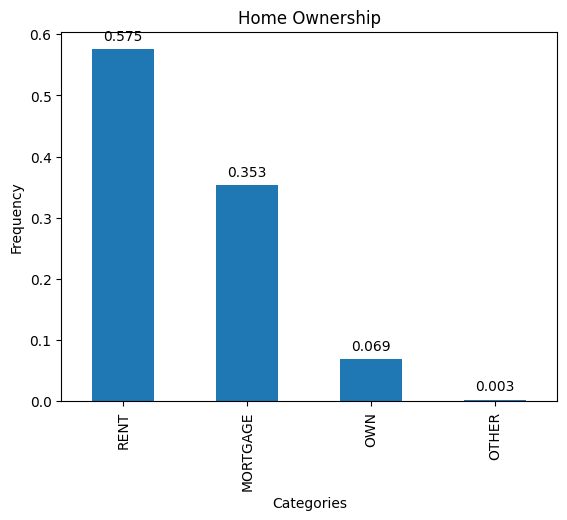

In [11]:
#person_home_ownership
plt.figure(figsize=(10, 6))
count =raw_data_copy['person_home_ownership'].value_counts('normalize = True')
chart = count.plot.bar(title='Home Ownership', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 57.5% of the people who apply for a loan pay rent
- 35.3% of the people who apply for a loan pay a mortgage
- 6.9% of the people who apply for a loan own a house
- 0.3% of the people who apply for a loan have other living arrangements

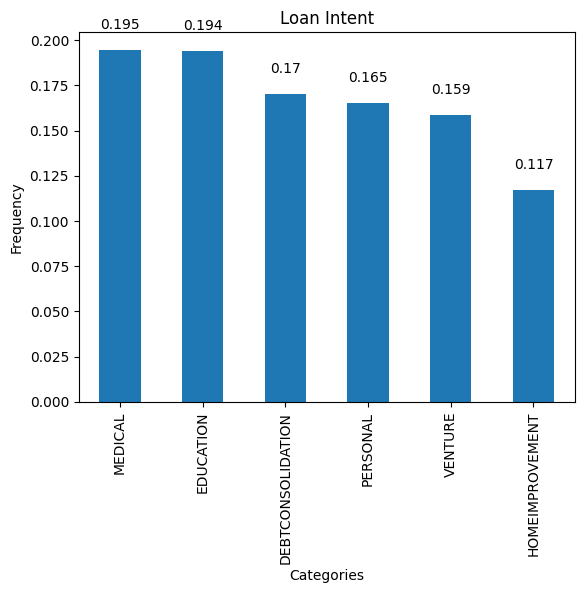

In [12]:
#loan_intent
plt.figure(figsize=(13, 6))
count =raw_data_copy['loan_intent'].value_counts('normalize = True')
chart = count.plot.bar(title='Loan Intent', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 19.6% of the people apply for a loan for their Education
- 19.4% of the people apply for a loan for their Medical bills
- 17.0% of the people apply for a loan for their Debt Consolidations
- 16.5% of the people apply for a loan for Personal reason
- 15.9% of the people apply for a loan for Venture funding
- 11.7% of the people apply for a loan for Home Improvements

### *Independent Attributes (Nominal)*
Nominal data does not have any kind of order or hierarchy but rather each category are different from each other. For example, the different breeds of dogs (Labrador, Beagle, Poodle) constitute nominal data because there is no inherent order among them.

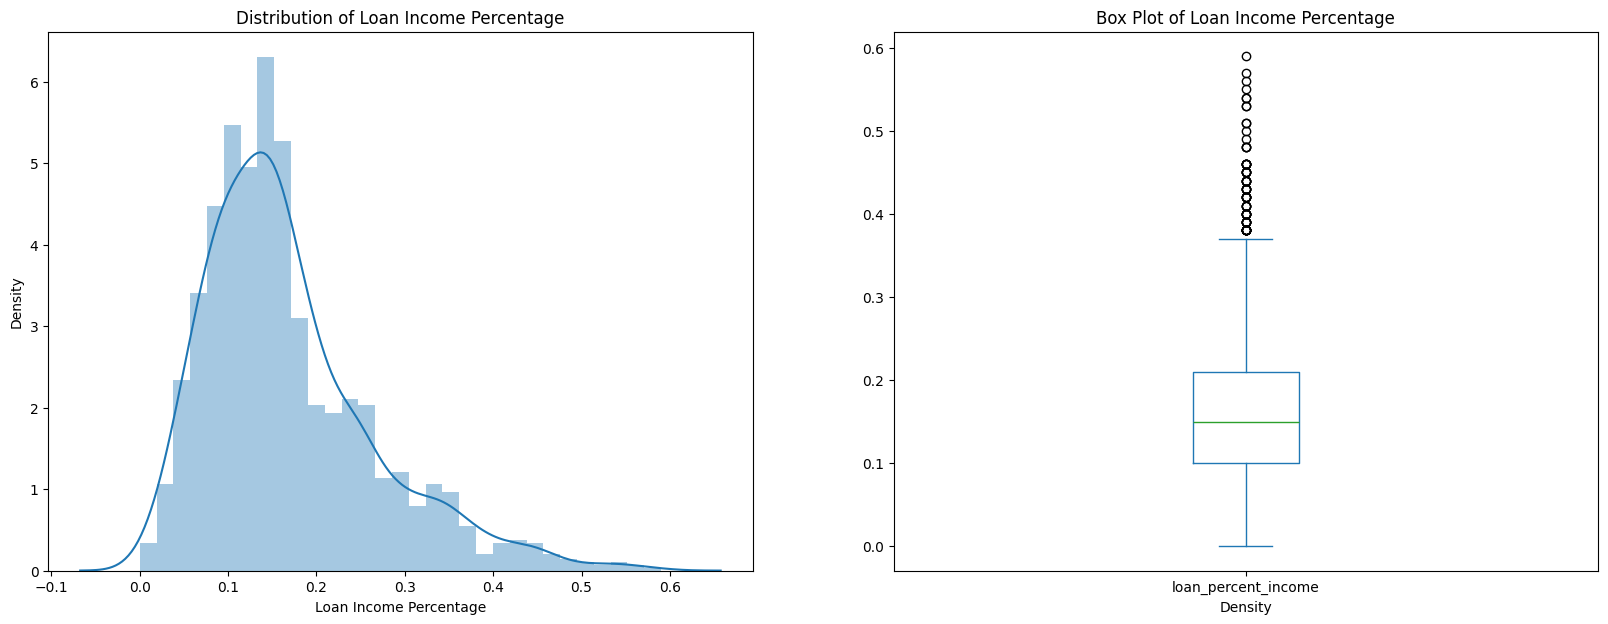

In [20]:
#loan_percent_income
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['loan_percent_income'])
plt.title('Distribution of Loan Income Percentage')
plt.xlabel('Loan Income Percentage')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['loan_percent_income'].plot.box()
boxplot.set_title('Box Plot of Loan Income Percentage')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph shows a right-skewed distribution, indicating most loan income percentages are low, with fewer high values.
- The box plot reveals the quartiles of the data and potential outliers above the upper whisker.

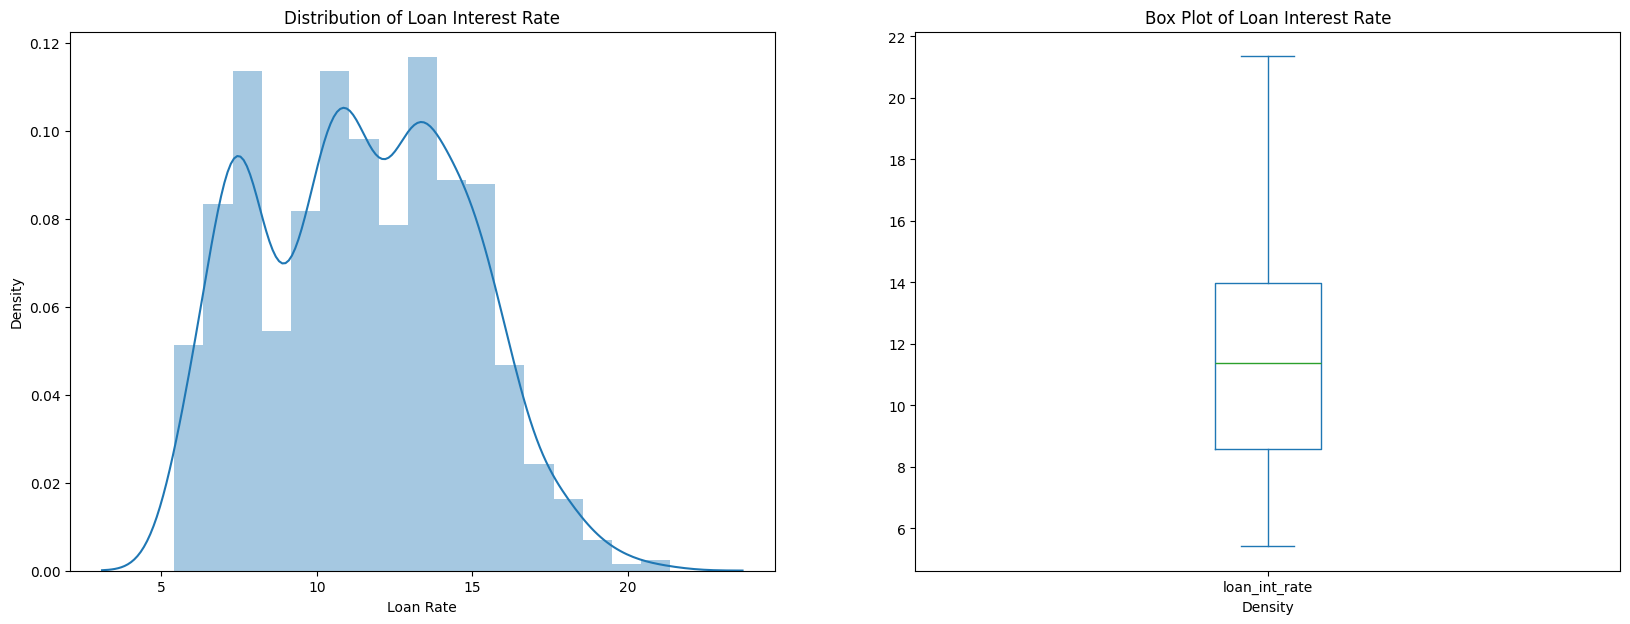

In [21]:
#loan_int_rate
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['loan_int_rate'])
plt.title('Distribution of Loan Interest Rate')
plt.xlabel('Loan Rate')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['loan_int_rate'].plot.box()
boxplot.set_title('Box Plot of Loan Interest Rate')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph shows a right-skewed distribution of loan rates, with the majority of values clustered between 5% and 10%.
- The box plot indicates the median rate at around 10%, with half of the rates falling between approximately 7.5% and 12.5%. 
- The box plot indicates that outliers are present above the upper whisker.

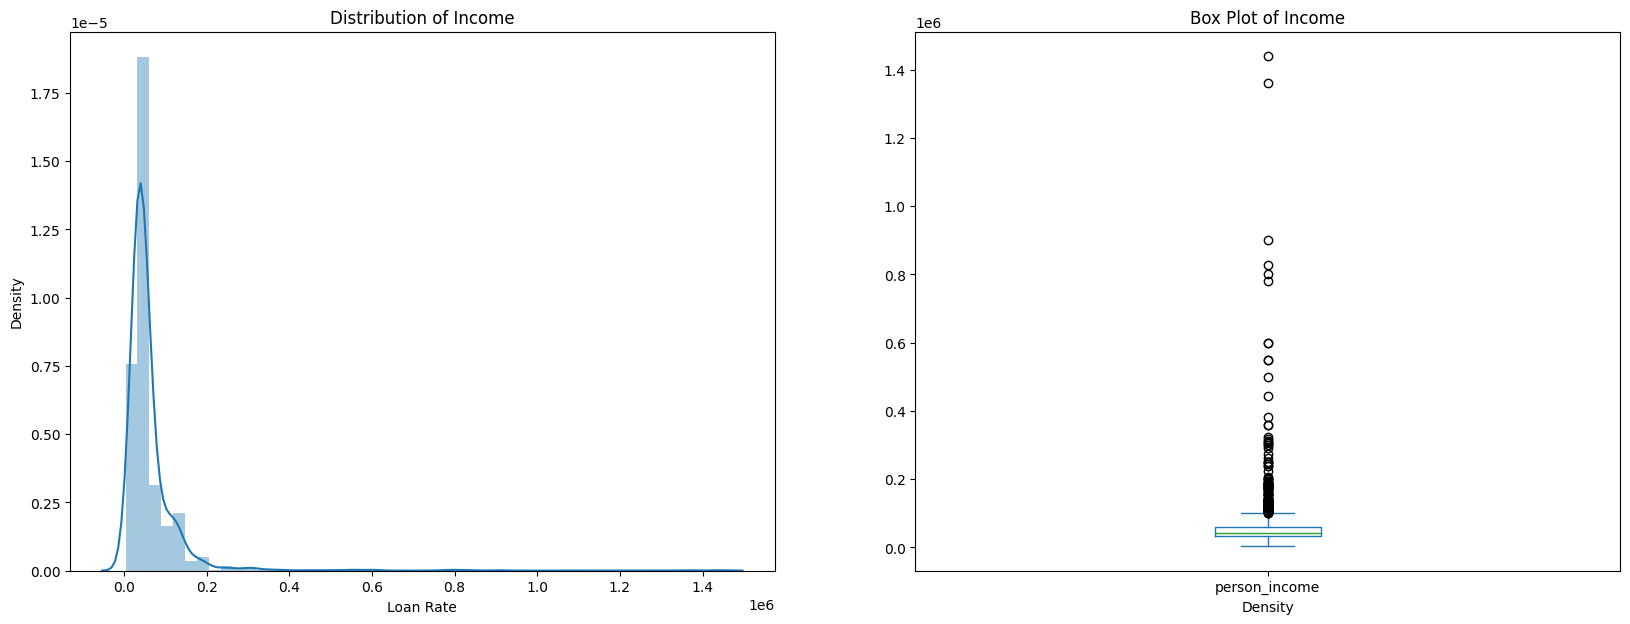

In [22]:
#person_income
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['person_income'])
plt.title('Distribution of Income')
plt.xlabel('Loan Rate')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['person_income'].plot.box()
boxplot.set_title('Box Plot of Income')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph indicates a peak near zero with a long tail, suggesting a large number of individuals with low income and fewer with high income, reflecting economic inequality.
- The box plot shows there are  outliers indicating individuals with significantly higher incomes.

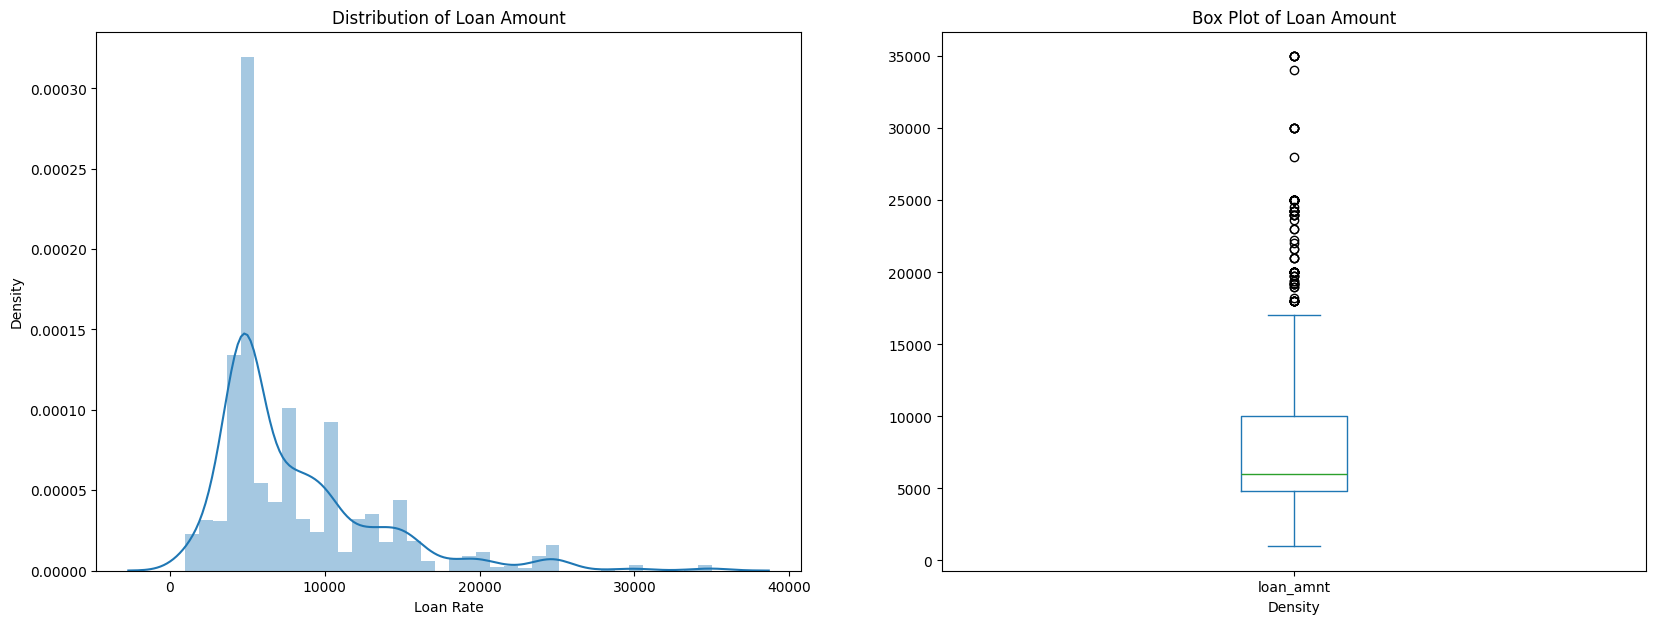

In [23]:
#loan_amnt
plt.figure(1, figsize=(20, 7))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['loan_amnt'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Rate')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['loan_amnt'].plot.box()
boxplot.set_title('Box Plot of Loan Amount')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The distribution graph shows a right-skewed distribution with a majority of the loans being of lower amounts, indicating that smaller loans are more common.
- The box plot shows that their are outliers of loans significantly larger than the majority.

# 3. Bi-variate Analysis
- When there are two variables in the data it is called bi-variate analysis. 
- Data is analyzed to find the relationship between the dependent and independent variables.
- Analyzing bi-variate data involves the following techniques:
    - Scatter plots and stacked bar graphs
    - Correlation Coefficients
    - Covariance matrices
- The graphs created below will display how the Dependent Attribute ‘loan_status’ is distributed within each Independent Attribute, regardless of how many observations there are.

__Ordinal Independent Variables and Dependent Variable__

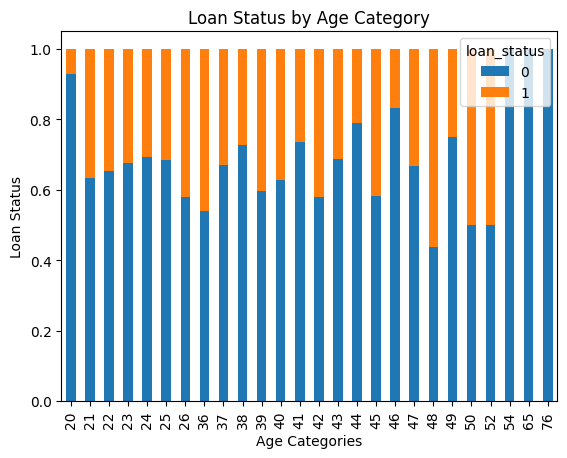

In [24]:
# Loan_Status vs person_age
person_age = pd.crosstab(raw_data_copy['person_age'], raw_data_copy['loan_status'])
person_age.div(person_age.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Age Category')
plt.xlabel('Age Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
- Individuals with the age group of 20 have all been aproved for a loan where as individuals of age 49 have all been rejected.
- The graph suggests that age is a significant factor in loan approval decisions by lenders.

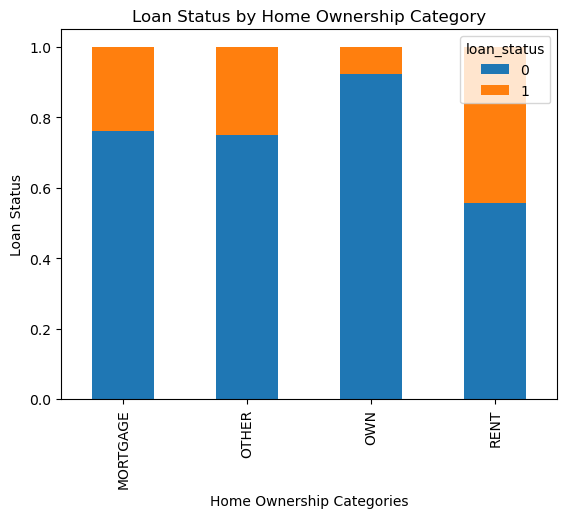

In [ ]:
# Loan_Status vs person_home_ownership
person_home_ownership = pd.crosstab(raw_data_copy['person_home_ownership'], raw_data_copy['loan_status'])
person_home_ownership.div(person_home_ownership.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Home Ownership Category')
plt.xlabel('Home Ownership Categories')
plt.ylabel('Loan Status')
plt.show()

***Insights Gained:***

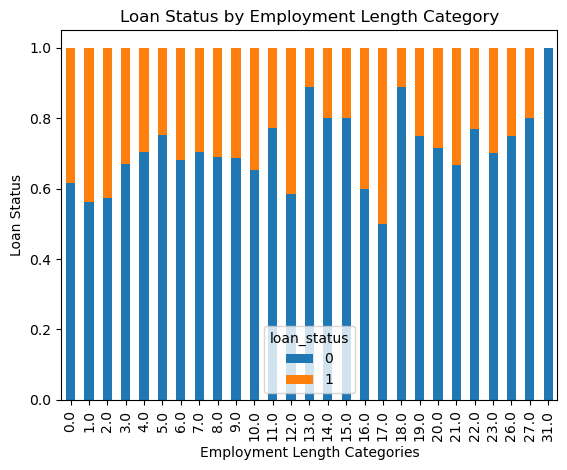

In [ ]:
# Loan_Status vs person_emp_length
person_emp_length = pd.crosstab(raw_data_copy['person_emp_length'], raw_data_copy['loan_status'])
person_emp_length.div(person_emp_length.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Employment Length Category')
plt.xlabel('Employment Length Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
- The proportions of loans that are fully paid or charged off are relatively consistent across all employment length categories.
- Employment length does not appear to be a strong indicator of loan repayment behavior, as there is no significant difference in loan status distribution among the categories.
- The graph suggests that factors other than employment length might be more influential in determining whether a loan will be fully paid or charged off.

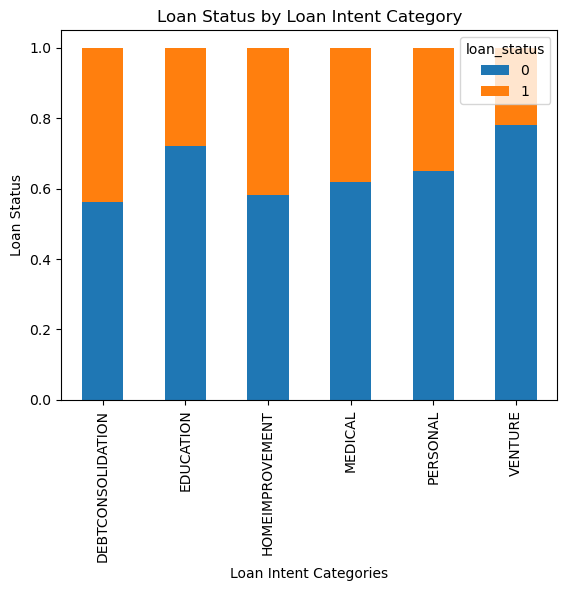

In [ ]:
loan_intent = pd.crosstab(raw_data_copy['loan_intent'], raw_data_copy['loan_status'])
loan_intent.div(loan_intent.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Loan Intent Category')
plt.xlabel('Loan Intent Categories')
plt.ylabel('Loan Status')
plt.show()

***Insights Gained:***

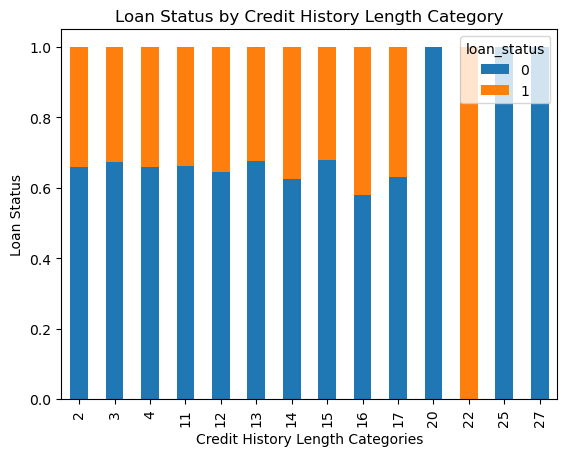

In [ ]:
# Loan_Status vs cb_person_cred_hist_length
cb_person_cred_hist_length = pd.crosstab(raw_data_copy['cb_person_cred_hist_length'], raw_data_copy['loan_status'])
cb_person_cred_hist_length.div(cb_person_cred_hist_length.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit History Length Category')
plt.xlabel('Credit History Length Categories')
plt.ylabel('Loan Status')
plt.show()

***Insights Gained:***

__Numerical Independent Variables and Dependent Variable LoanAmount__

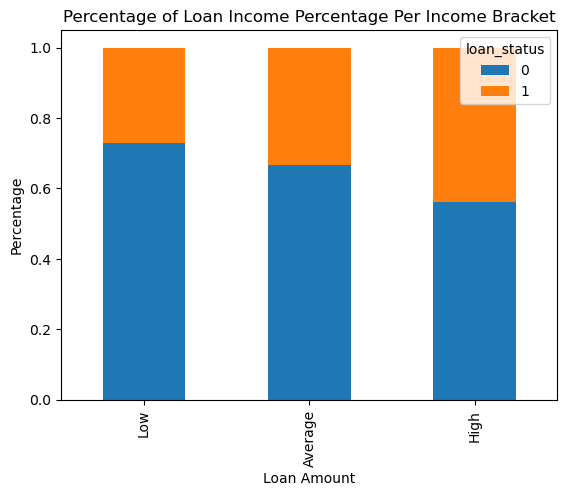

In [ ]:
# Loan_Status vs loan_percent_income
low = raw_data_copy['loan_percent_income'].quantile(0.333) # 33.3th percentile
average = raw_data_copy['loan_percent_income'].quantile(0.666) # 66.6th percentile
high = 0.6

bins = [0, low, average, high]
group=['Low','Average','High']

raw_data_copy['loan_percent_income_bin']=pd.cut(raw_data_copy['loan_percent_income'],bins,labels=group)
loan_percent_income_bin=pd.crosstab(raw_data_copy['loan_percent_income_bin'],raw_data_copy['loan_status'])
loan_percent_income_bin.div(loan_percent_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Loan Income Percentage Per Income Bracket')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

***Insights Gained:***

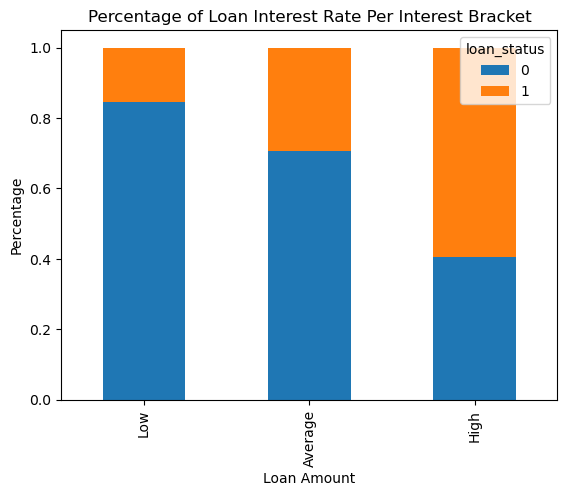

In [ ]:
# Loan_Status vs loan_int_rate
low = raw_data_copy['loan_int_rate'].quantile(0.333) # 33.3th percentile
average = raw_data_copy['loan_int_rate'].quantile(0.666) # 66.6th percentile
high = 22

bins = [0, low, average, high]
group=['Low','Average','High']

raw_data_copy['loan_int_rate_bin']=pd.cut(raw_data_copy['loan_int_rate'],bins,labels=group)
loan_int_rate_bin=pd.crosstab(raw_data_copy['loan_int_rate_bin'],raw_data_copy['loan_status'])
loan_int_rate_bin.div(loan_int_rate_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Loan Interest Rate Per Interest Bracket')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

***Insights Gained:***

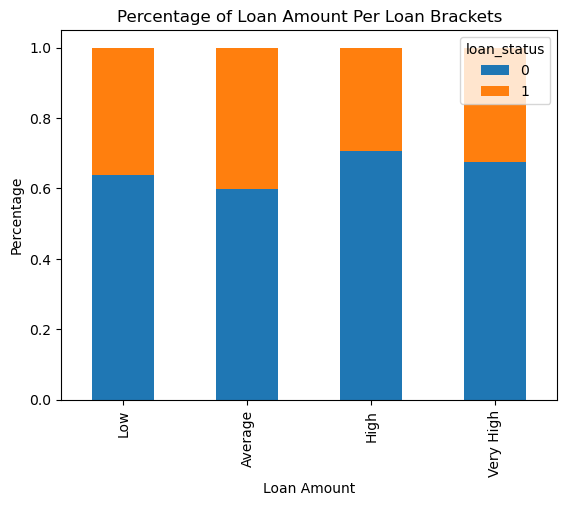

In [ ]:
# Loan_Status vs loan_amnt
low = raw_data_copy['loan_amnt'].quantile(0.25) # 25th percentile
average = raw_data_copy['loan_amnt'].quantile(0.50) # 50th percentile
above_average = raw_data_copy['loan_amnt'].quantile(0.75) # 75th percentile
veryHigh = raw_data_copy['loan_amnt'].max() + 1 # maximum loan amount plus 1

bins = [0, low, average, above_average, veryHigh]
group=['Low','Average','High', 'Very High']

raw_data_copy['loan_amnt_bin'] = pd.cut(raw_data_copy['loan_amnt'], bins, labels=group)
loan_amnt_bin = pd.crosstab(raw_data_copy['loan_amnt_bin'], raw_data_copy['loan_status'])
loan_amnt_bin.div(loan_amnt_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Percentage of Loan Amount Per Loan Brackets')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

***Insights Gained:***

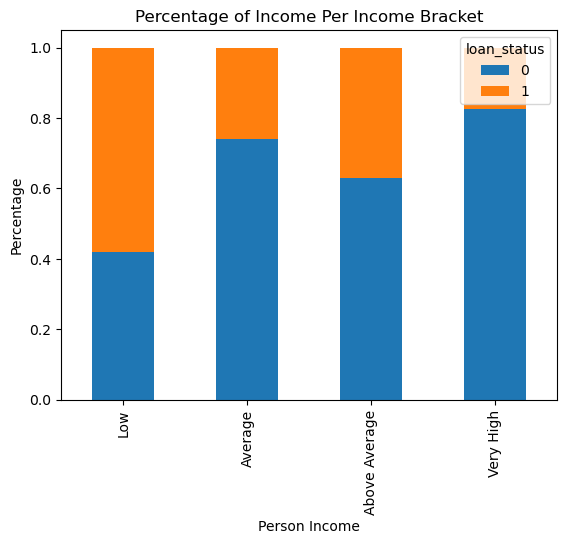

In [ ]:
# Loan_Status vs person_income
low = raw_data_copy['person_income'].quantile(0.25) # 25th percentile
average = raw_data_copy['person_income'].quantile(0.50) # 50th percentile
above_average = raw_data_copy['person_income'].quantile(0.75) # 75th percentile
veryHigh = raw_data_copy['person_income'].max()+ 1 

bins = [0, low, average, above_average, veryHigh]
group=['Low','Average','Above Average', 'Very High']

raw_data_copy['person_income_bin'] = pd.cut(raw_data_copy['person_income'], bins, labels=group)
person_income_bin = pd.crosstab(raw_data_copy['person_income_bin'], raw_data_copy['loan_status'])
person_income_bin.div(person_income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Percentage of Income Per Income Bracket')
plt.xlabel('Person Income')
plt.ylabel('Percentage')
plt.show()

Drop all bins created

In [ ]:
raw_data_copy=raw_data_copy.drop(['loan_percent_income_bin', 'loan_int_rate_bin', 'loan_amnt_bin', 'person_income_bin'],axis=1)

Using a Heatmap, the numerical attributes in the dataset is viewed to gain insight into the overall comparison through the colour shade variations

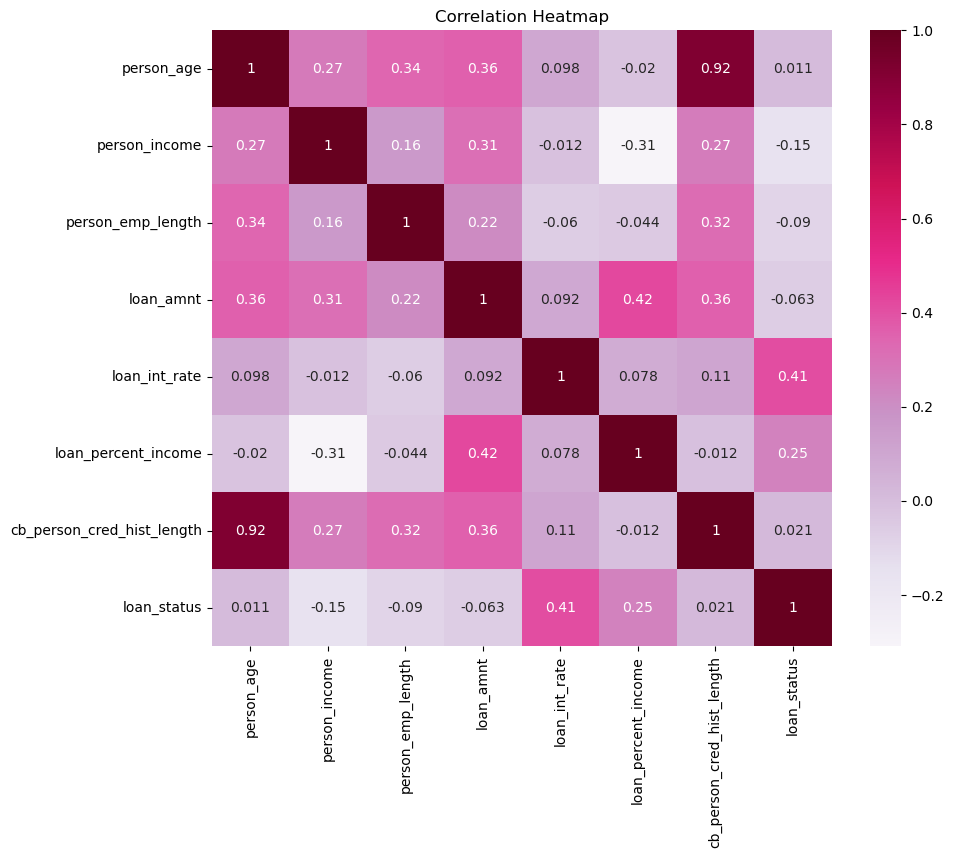

In [ ]:
numeric_cols = raw_data_copy.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

***Insight Gained:***
- ‘person_age’ and ‘person_income’ have a dark red cell at their intersection, it means they are strongly positively correlated. As one increases, the other also tends to increase.
- ‘person_age’ and ‘loan_intent’ have a dark purple cell at their intersection, it means they are strongly negatively correlated. As one increases, the other tends to decrease.
- ‘person_weight’ and ‘person_income’, ‘loan_amount’ and ‘person_home_ownership’, ‘loan_intent’ and ‘loan_percent_income’ all have weak or no correlations

Having now seen how the different attributes impact the outcome in our datasets, several hypotheses can be drawn from the results.

===================================================================================
# **2. Hypotheses**

- __Hypothesis 1__: 
    - Justification: 

- __Hypothesis 2__: 
    - Justification: 

- __Hypothesis 3__: 
    - Justification: 

- __Hypothesis 4__: 
    - Justification: 

- __Hypothesis 5__: 
    - Justification: 

===================================================================================

# **3. Data Cleaning**

===================================================================================

# **4. Split Dataset**

===================================================================================

# **5. Model 1**

===================================================================================

# **6. Model 2**

===================================================================================

# **7. Validate Model 2**

===================================================================================

# **8. Web Application**